In [1]:
import pandas as pd
import os
import numpy as np
import pytz
from datetime import datetime
import warnings
from sklearn import linear_model, metrics
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import scipy.stats as st
import datetime as dt
pd.options.mode.chained_assignment = None
from helper_visualization import set_intensity, inlab_preprocess, plot_subplot, blandAltman_lab
warnings.filterwarnings("ignore")

### Content
<ol>
    <li>MetCart MET ground truth comparison.</li>
    <li>Bland-Altman Plot for MET estimation by algorithms.</li>
</ol>

In [2]:
ROOT_PATH_FSM = 'Y:/PrevMed/Alshurafa_Lab/Lab_Common/CalorieHarmony/A. Phase 2 Participants/'
PATH_RESAMPLE_ACC = '/Wild/Wrist/Clean/Resampled/Accelerometer/'
PATH_RESAMPLE_GYRO = '/Wild/Wrist/Clean/Resampled/Gyroscope/'

In [3]:
participant_list = ['1000','1002','1003','1004','1005','1006','1007','1008','1009','1010','1011','1012','1013','1014','1015']
activity_estimate = {'Typing on a computer while seated':1.3,
                     'Rest':1,
                     'Walking 2 mph on treadmill':2.8,
                     'Walking 3.5 mph on treadmill':4.3,
                     'Standing while fidgeting':1.8,
                     'Squats (shoulder length legs, get down to 90 degree angle)':5,
                     'Reading a book or magazine while reclining':1.3,
                     'General aerobics video':7.3,
                     'Sweeping slowly ':2.3,
                     'Push-ups against the wall':3.8,
                     'Running 4 mph on a treadmill':6,
                     'Lying down while doing nothing':1.3,
                     'Chester Step Test (0.25 m step at a rate of 30 steps per minute)':8}

### MetCart MET Ground Truth Comparison

In [ ]:
for p in participant_list:
    figure(figsize=(12, 8), dpi=80)
    df_result_all_temp = pd.read_csv('data_phase_2/'+str(p)+'/result/result_table.csv')
    plt.plot(df_result_all_temp['Datetime'], df_result_all_temp['MET (Ainsworth)'], label='MET (Ainsworth)')
    plt.plot(df_result_all_temp['Datetime'], df_result_all_temp['MET (MetCart)'], label='MET (MetCart)')
    plt.legend()
    plt.xlabel('Time') 
    plt.ylabel('MET Value')
    plt.title("MET Estimation by Ainsworth and MetCart (P:"+str(p)+")")

    i = 1
    for activity in list(activity_estimate.keys()):
        if(activity != 'Rest'):
            try:
                time = df_result_all_temp.loc[df_result_all_temp['Activity'] == activity].reset_index()['Datetime'][0]
                value = df_result_all_temp.loc[df_result_all_temp['Activity'] == activity].reset_index()['MET (MetCart)'][0]
                plt.text(time, value+0.7,'Activity '+str(i), ha='center', va='center',rotation='horizontal')
                i = i + 1
            except:
                i = i + 1
                continue
    #plt.savefig('plot/'+ str(p) + '.png')
    plt.show()

### Bland-Altman Plot

In [4]:
intensity_c = {'Sedentary': '#a8d0e3', # lightblue
               'Light': '#f6b79b', # peach
               'Moderate / Vigorous': '#DE6454' # red
              }

intensity_legend = {'Sedentary': '#a8d0e3', # lightblue
               'Light': '#f6b79b', # peach
               'Moderate /\n Vigorous': '#DE6454' # red
              }


<Figure size 960x640 with 0 Axes>

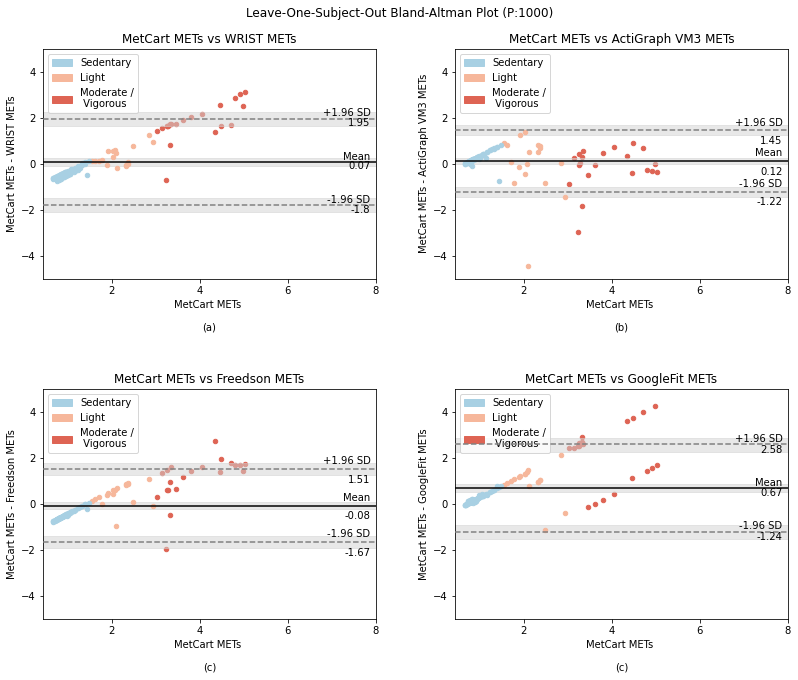

<Figure size 960x640 with 0 Axes>

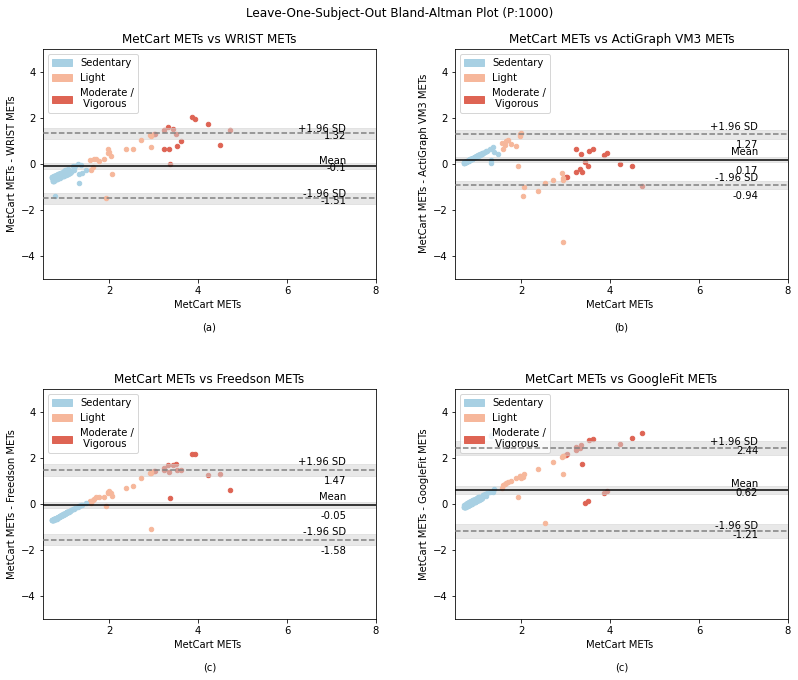

<Figure size 960x640 with 0 Axes>

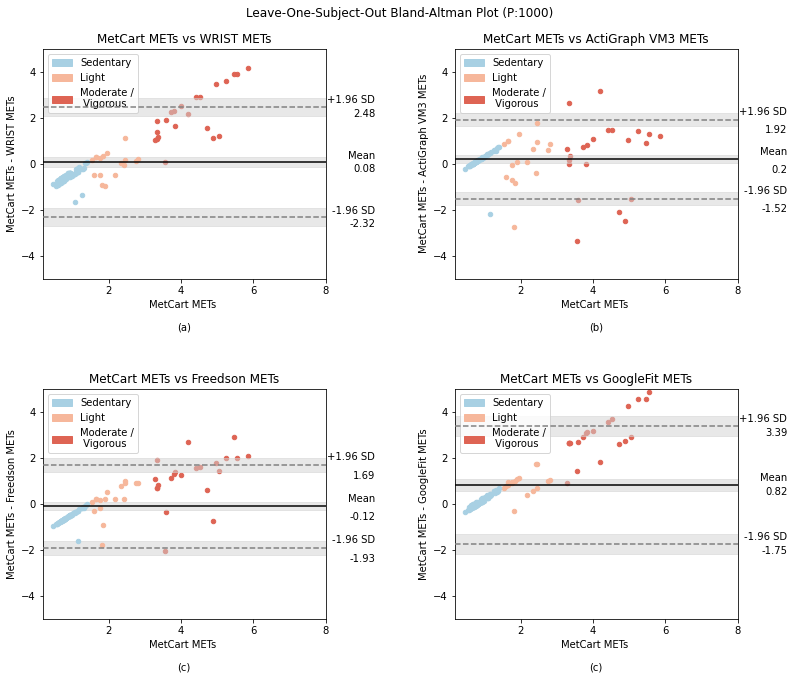

<Figure size 960x640 with 0 Axes>

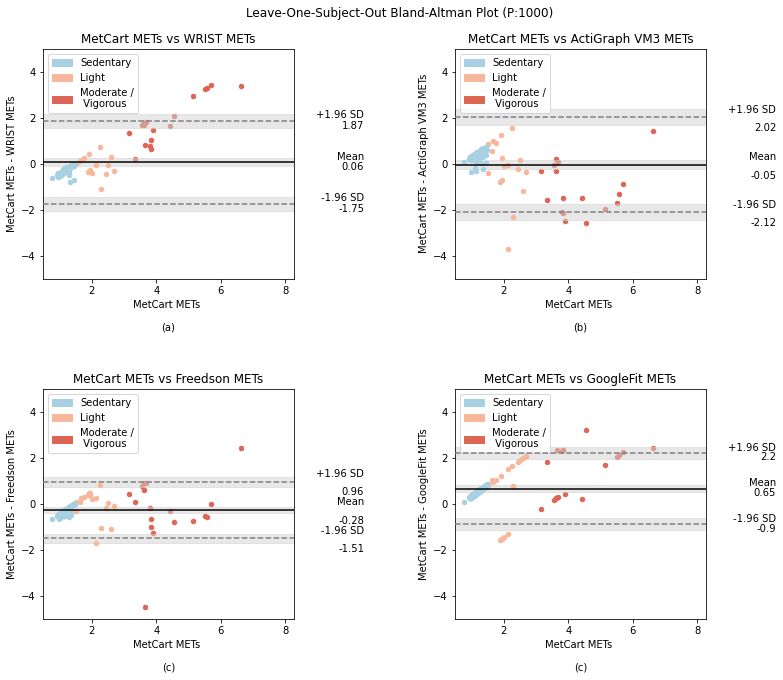

<Figure size 960x640 with 0 Axes>

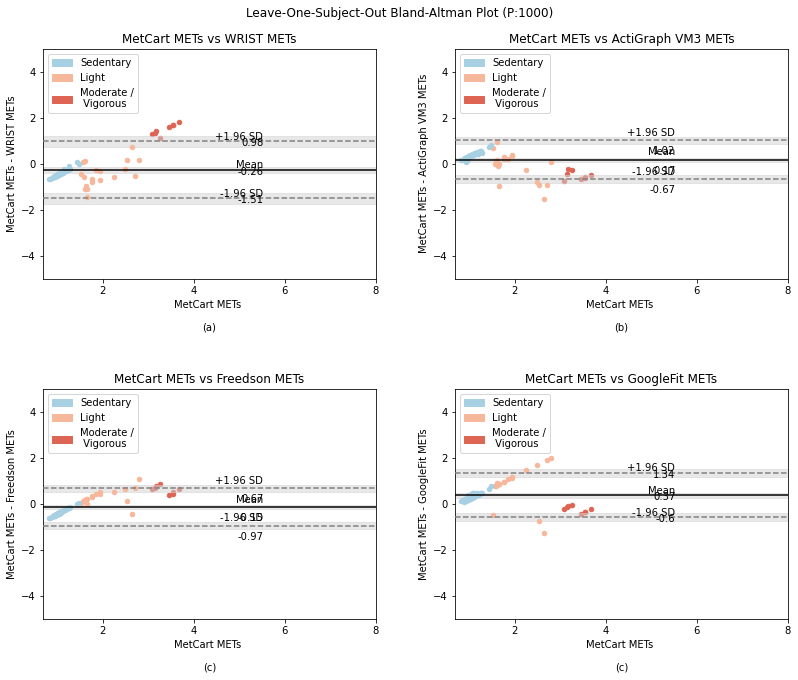

<Figure size 960x640 with 0 Axes>

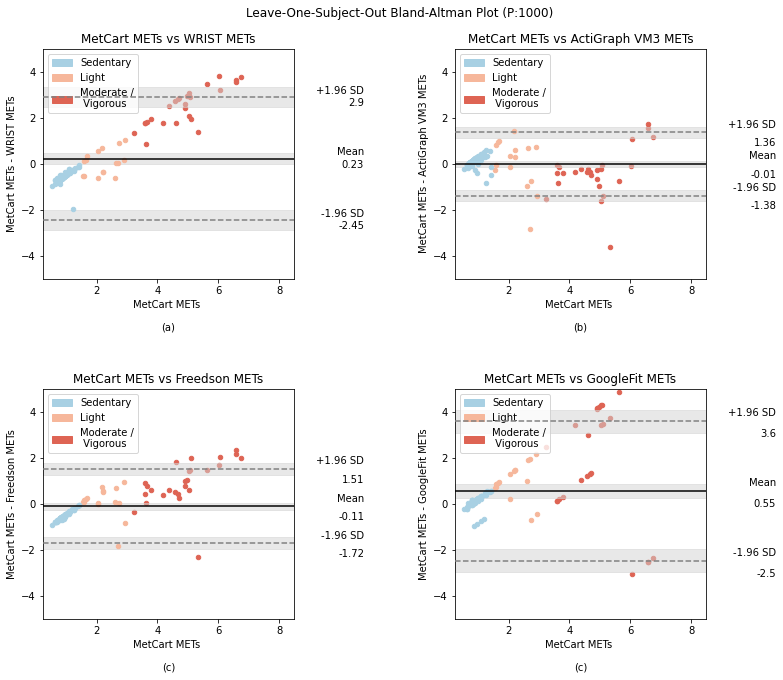

<Figure size 960x640 with 0 Axes>

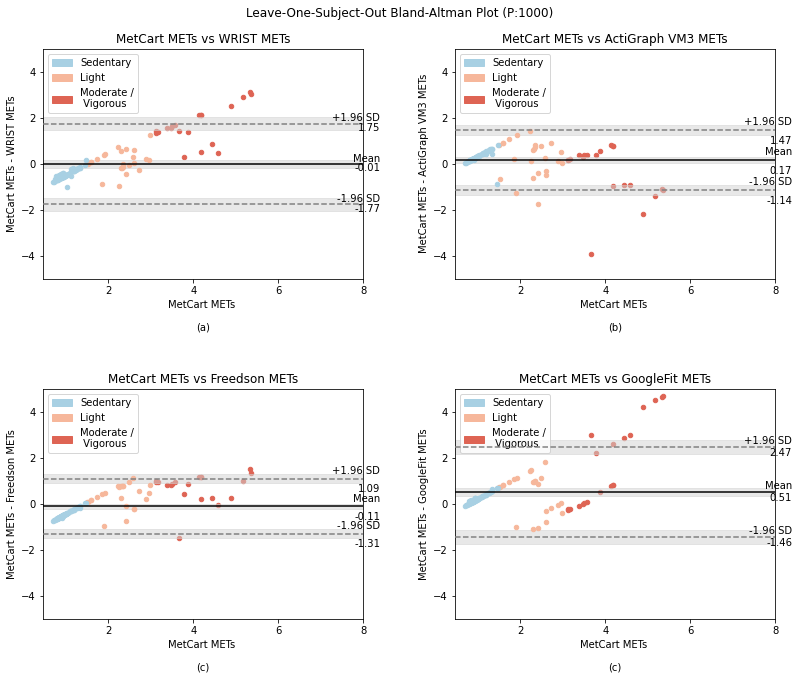

<Figure size 960x640 with 0 Axes>

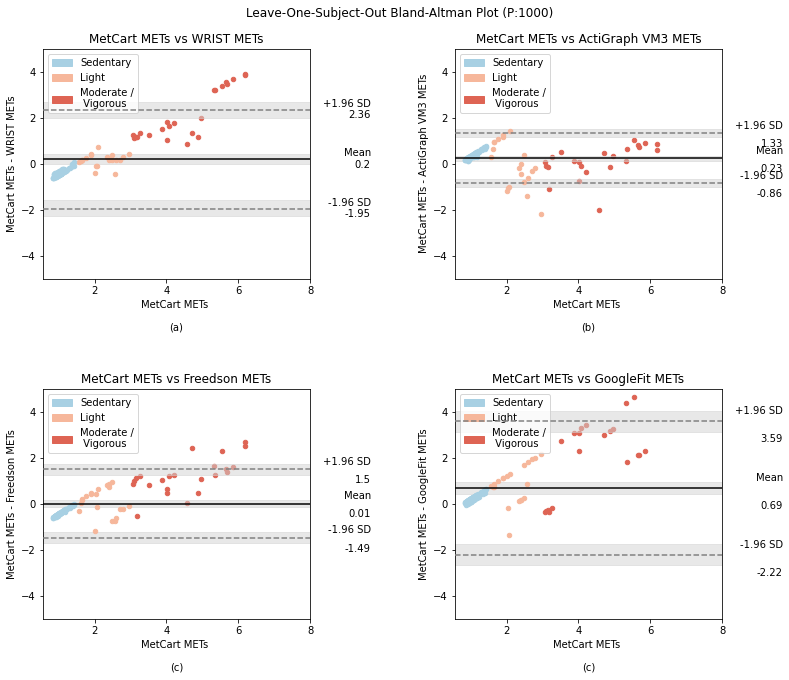

<Figure size 960x640 with 0 Axes>

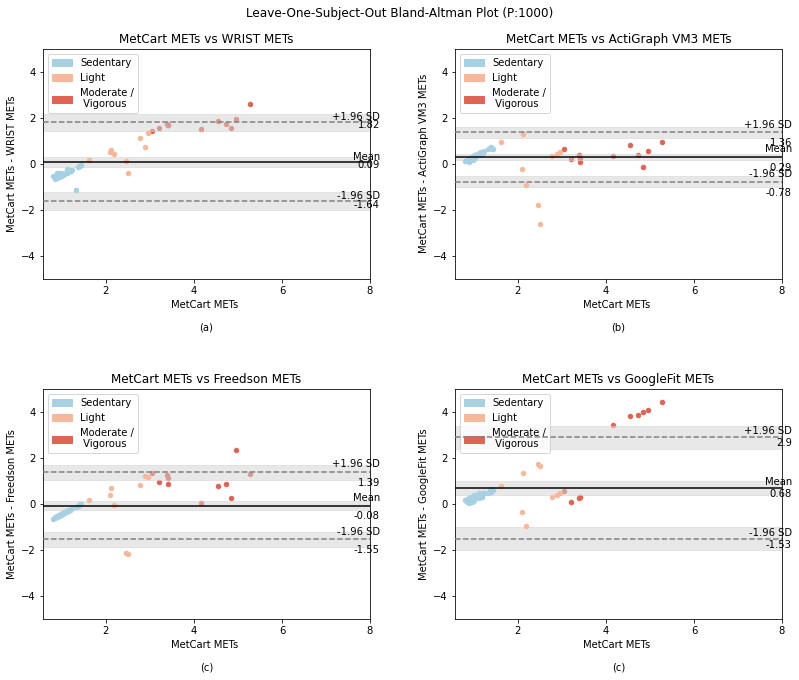

<Figure size 960x640 with 0 Axes>

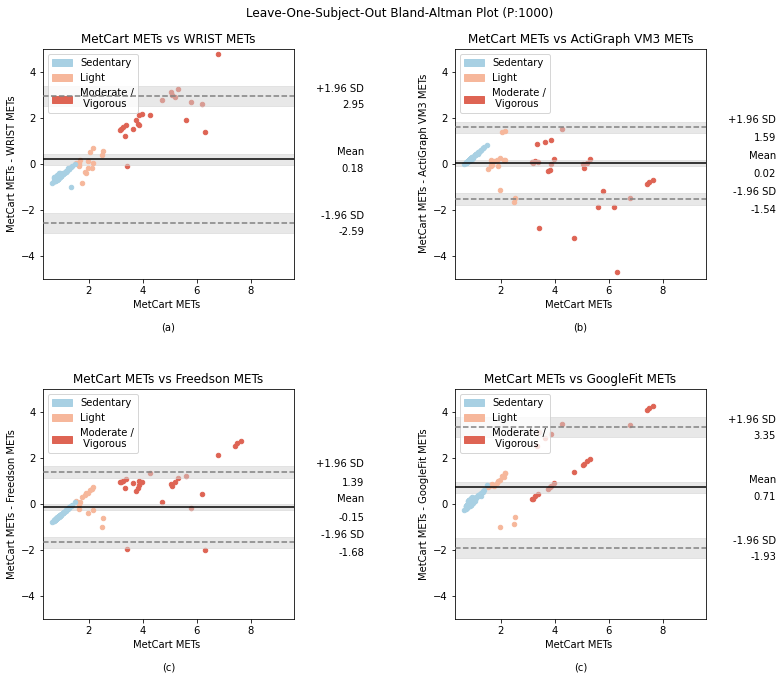

<Figure size 960x640 with 0 Axes>

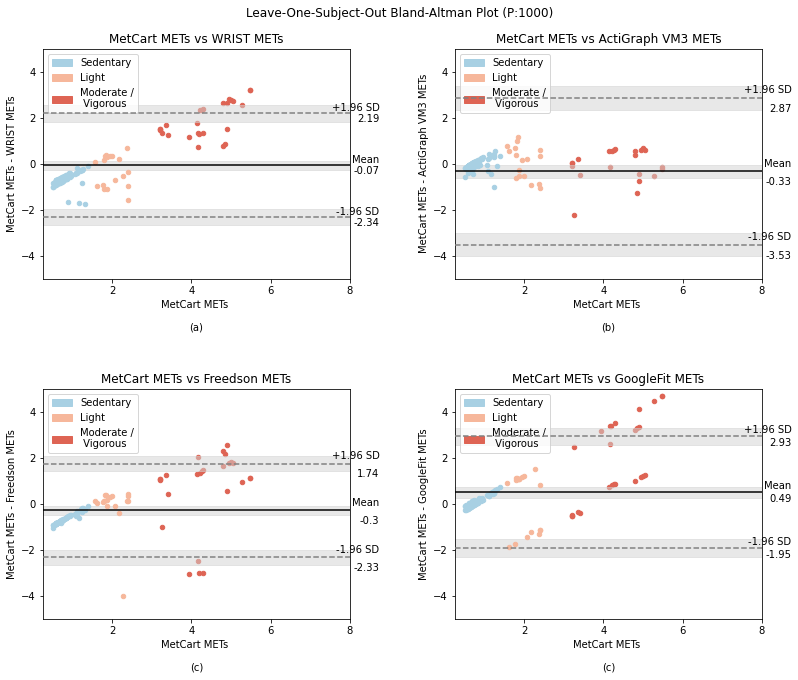

<Figure size 960x640 with 0 Axes>

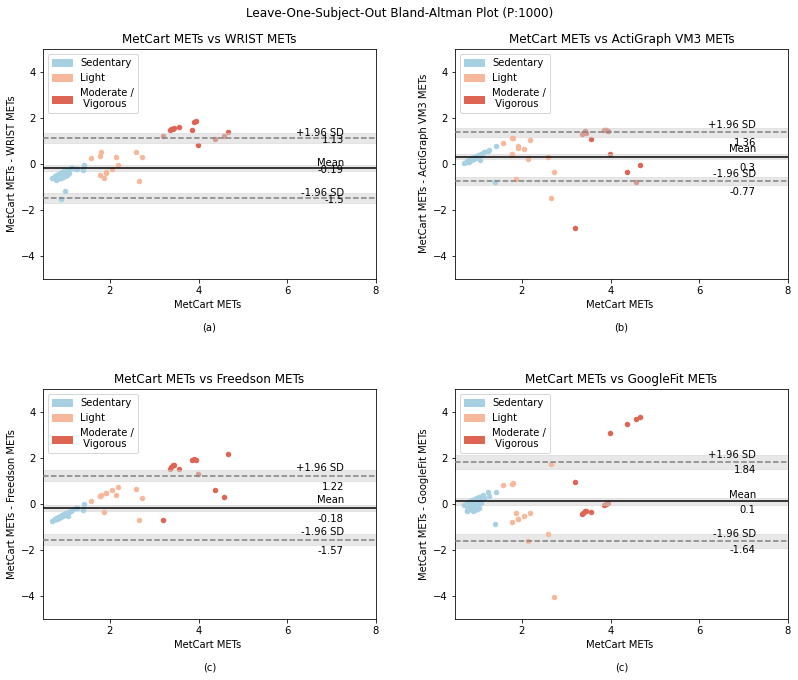

<Figure size 960x640 with 0 Axes>

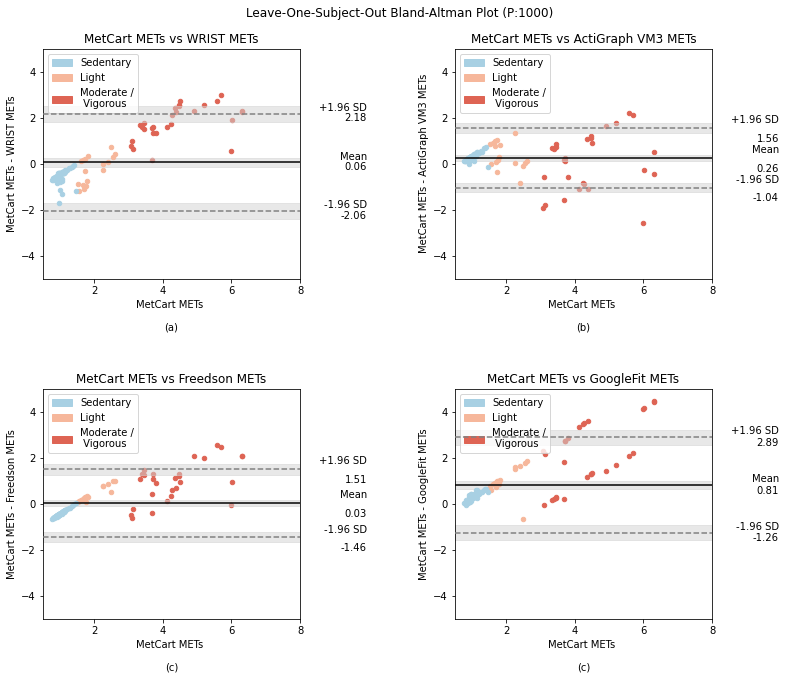

<Figure size 960x640 with 0 Axes>

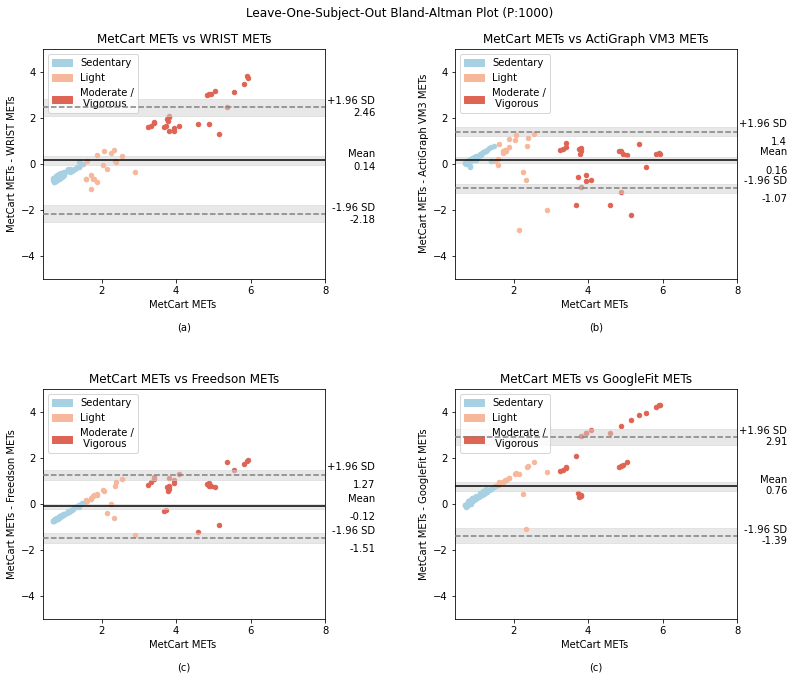

<Figure size 960x640 with 0 Axes>

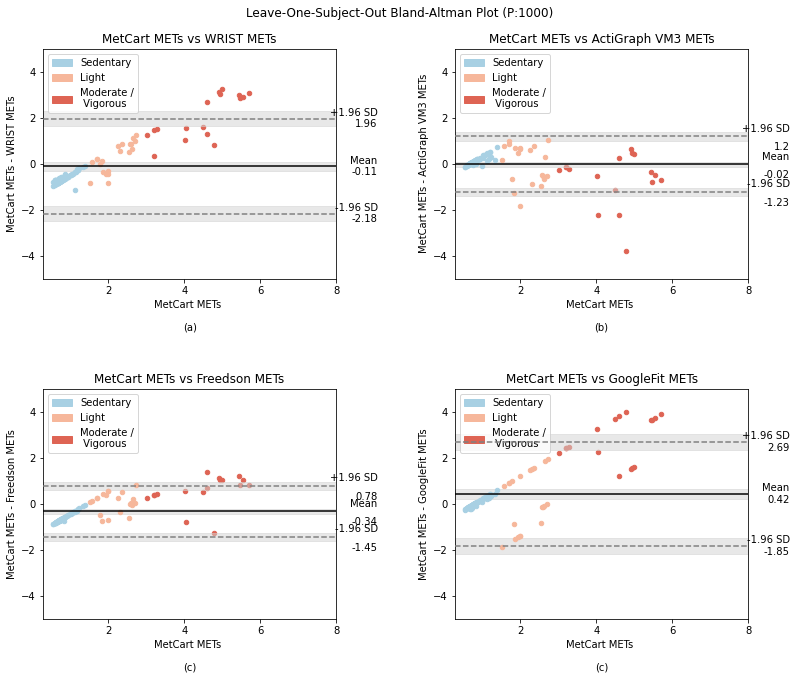

In [5]:
for p in participant_list:
    figure(figsize=(12, 8), dpi=80)
    df_final_temp = pd.read_csv('data_phase_2/'+str(p)+'/result/result_table.csv')
    df_inlab = inlab_preprocess(df_final_temp)
    blandAltman_lab(df_inlab, 'inlab', intensity_c, 'Intensity')